## Descriptive Analysis - Big companies

### Goal: Analyze and derive insights from dataset

### Sections:
#### * Section 1 - Importing Libraries
#### * Section 2 - Loading and Understanding the data
#### * Section 3 - Data processing
#### * Section 4 - Data Analysis - Visual EDA
#### * Section 5 - Insights and conclusion

The dataset contains information about some of the world's biggest companies around the globe and can be found on Kaggle.com: 'https://www.kaggle.com/datasets/marshuu/worlds-biggest-companies-dataset?select=cleaned_biggest_companies.csv'.

### 1. Importing libraries

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sns.set_theme(style= 'darkgrid')

### 2. Loading and understanding the data

In [2]:
df = pd.read_csv('cleaned_biggest_companies.csv')
df.head()

,Company Name,Country Founded,Year Founded,Revenue 2018,Revenue 2019,Revenue 2020,Net Income 2018,Net Income 2019,Net Income 2020,Industry
0,Amazon,United States,1994,232.9,280.5,386.1,21.3,21.3,21.3,Retail
1,Apple,United States,1976,265.6,260.2,274.5,59.5,55.2,111.4,Technology
2,Google,United States,1998,136.8,161.9,182.3,30.7,34.3,46.2,Technology
3,Microsoft,United States,1975,110.4,130.9,143.0,16.6,44.3,53.0,Technology
4,Alibaba,China,1999,39.9,56.1,70.2,12.9,14.9,11.9,Retail


In [3]:
# General info about each variable and its data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company Name     274 non-null    object 
 1   Country Founded  274 non-null    object 
 2   Year Founded     274 non-null    int64  
 3   Revenue 2018     274 non-null    float64
 4   Revenue 2019     274 non-null    float64
 5   Revenue 2020     274 non-null    float64
 6   Net Income 2018  274 non-null    float64
 7   Net Income 2019  274 non-null    float64
 8   Net Income 2020  274 non-null    float64
 9   Industry         274 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 21.5+ KB


In [4]:
# Checking null values
df.isna().sum()

Company Name       0
Country Founded    0
Year Founded       0
Revenue 2018       0
Revenue 2019       0
Revenue 2020       0
Net Income 2018    0
Net Income 2019    0
Net Income 2020    0
Industry           0
dtype: int64

In [5]:
# Checking duplicates by company name
df[df['Company Name'].duplicated()].sort_values(by= 'Company Name')

,Company Name,Country Founded,Year Founded,Revenue 2018,Revenue 2019,Revenue 2020,Net Income 2018,Net Income 2019,Net Income 2020,Industry
34,Anheuser-Busch InBev,Belgium,1366,54.600,54.600,52.300,9.700,10.200,9.100,Beverages
115,BP,United Kingdom,1909,303.700,303.500,303.300,6.200,4.700,3.200,Oil and gas
22,Chevron,United States,1879,134.600,134.300,121.500,14.800,11.900,5.600,Oil
169,Danske Bank,Estonia,1992,0.051,0.052,0.053,0.051,0.052,0.053,Banking
32,Goldman Sachs,United States,1869,32.200,32.700,32.800,7.600,9.800,11.300,Investment
28,Johnson & Johnson,United States,1886,81.600,82.100,82.000,16.300,15.500,16.400,Healthcare
204,MTN Group,Nigeria,1994,3.300,3.500,3.600,0.500,0.600,0.700,Telecommunications
165,Nordea Bank,Sweden,1997,10.800,11.000,11.200,1.100,2.100,3.100,Banking
116,Royal Dutch Shell,United Kingdom,1907,388.400,396.600,404.800,23.700,19.700,15.700,Oil and gas
118,Unilever,United Kingdom,1929,60.200,61.900,63.600,7.100,7.900,8.700,Consumer goods


In [6]:
# We have 10 duplicates, removing duplicates founded in the wrong country
df = df.drop(index=[21, 24, 14, 29, 9, 23, 20, 169, 204, 165])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 273
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company Name     264 non-null    object 
 1   Country Founded  264 non-null    object 
 2   Year Founded     264 non-null    int64  
 3   Revenue 2018     264 non-null    float64
 4   Revenue 2019     264 non-null    float64
 5   Revenue 2020     264 non-null    float64
 6   Net Income 2018  264 non-null    float64
 7   Net Income 2019  264 non-null    float64
 8   Net Income 2020  264 non-null    float64
 9   Industry         264 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 22.7+ KB


### 3. Data Processing

In [8]:
# Unpivoting the yearly Revenue and Net income columns into rows
revenue_df = df.melt(id_vars= 'Company Name', value_vars= ['Revenue 2018','Revenue 2019','Revenue 2020'])
income_df = df.melt(id_vars= 'Company Name', value_vars= ['Net Income 2018','Net Income 2019','Net Income 2020'])
revenue_df.sort_values(by='Company Name').head(6)

,Company Name,variable,value
697,ACS,Revenue 2020,57.4
169,ACS,Revenue 2018,56.2
433,ACS,Revenue 2019,56.8
408,AMP,Revenue 2019,16.5
672,AMP,Revenue 2020,16.7
144,AMP,Revenue 2018,16.3


In [9]:
# Removing non numeric values from the 'variable' columns
revenue_df['variable'] = revenue_df['variable'].str.replace('Revenue ','',)
income_df['variable'] = income_df['variable'].str.replace('Net Income ','',)
revenue_df.sort_values(by='Company Name').head(6)

,Company Name,variable,value
697,ACS,2020,57.4
169,ACS,2018,56.2
433,ACS,2019,56.8
408,AMP,2019,16.5
672,AMP,2020,16.7
144,AMP,2018,16.3


In [10]:
# Joining unpivoted columns and converting 'variable' column to datetime
df_new = pd.merge(revenue_df, income_df, left_on=['Company Name','variable'], right_on=['Company Name','variable'],)
df_new['variable'] = pd.to_datetime(df_new['variable'])
df_new['variable']=df_new['variable'].dt.year
df_new.sort_values(by=['Company Name','variable']).head(9)


,Company Name,variable,value_x,value_y
169,ACS,2018,56.2,5.6
433,ACS,2019,56.8,6.6
697,ACS,2020,57.4,7.6
144,AMP,2018,16.3,1.3
408,AMP,2019,16.5,2.3
672,AMP,2020,16.7,3.3
135,ANZ,2018,27.6,6.6
399,ANZ,2019,28.2,5.6
663,ANZ,2020,28.8,4.6


In [11]:
# Quick verification with above output
df.sort_values(by='Company Name').head(3)

,Company Name,Country Founded,Year Founded,Revenue 2018,Revenue 2019,Revenue 2020,Net Income 2018,Net Income 2019,Net Income 2020,Industry
178,ACS,Spain,1997,56.2,56.8,57.4,5.6,6.6,7.6,Construction and services
151,AMP,Australia,1849,16.3,16.5,16.7,1.3,2.3,3.3,Financial services
142,ANZ,Australia,1951,27.6,28.2,28.8,6.6,5.6,4.6,Banking


In [12]:
# Recreating the original data set (unpivoted)
df_final = pd.merge(df_new, df[['Company Name','Country Founded','Year Founded', 'Industry']].copy(), on='Company Name')
df_final.sort_values(by=['Company Name','variable']).head(6)

,Company Name,variable,value_x,value_y,Country Founded,Year Founded,Industry
507,ACS,2018,56.2,5.6,Spain,1997,Construction and services
508,ACS,2019,56.8,6.6,Spain,1997,Construction and services
509,ACS,2020,57.4,7.6,Spain,1997,Construction and services
432,AMP,2018,16.3,1.3,Australia,1849,Financial services
433,AMP,2019,16.5,2.3,Australia,1849,Financial services
434,AMP,2020,16.7,3.3,Australia,1849,Financial services


In [13]:
# Renaming columns
df_final.rename(columns= {'variable': 'Year', 'value_x': 'Revenue', 'value_y': 'Net Income', 
    'Country Founded_x': 'Country Founded', 'Year Founded_x': 'Year Founded', 'Industry_x': 'Industry'}, inplace=True)
#df_final.drop(['Country Founded_y', 'Year Founded_y', 'Industry_y'], axis= 1, inplace=True)
df_final.sort_values(by=['Company Name','Year']).head(6)

,Company Name,Year,Revenue,Net Income,Country Founded,Year Founded,Industry
507,ACS,2018,56.2,5.6,Spain,1997,Construction and services
508,ACS,2019,56.8,6.6,Spain,1997,Construction and services
509,ACS,2020,57.4,7.6,Spain,1997,Construction and services
432,AMP,2018,16.3,1.3,Australia,1849,Financial services
433,AMP,2019,16.5,2.3,Australia,1849,Financial services
434,AMP,2020,16.7,3.3,Australia,1849,Financial services


In [14]:
df_final['Company Name'].value_counts().tail()

Ukrainian Railways          3
Agromet                     3
Kredyt Bank                 3
Budimex                     3
Singapore Press Holdings    3
Name: Company Name, dtype: int64

In [15]:
df_final['Company Name'].value_counts().head()

Amazon            3
LG                3
Ferrovial         3
Banco Sabadell    3
ACS               3
Name: Company Name, dtype: int64

In [16]:
df_final.describe()

,Year,Revenue,Net Income,Year Founded
count,792.000000,792.000000,792.000000,792.000000
mean,2019.000000,53.036879,5.512938,1933.378788
std,0.817013,81.420550,8.411524,74.107128
min,2018.000000,0.029000,-1.580000,1366.000000
25%,2018.000000,9.075000,0.920750,1900.500000
50%,2019.000000,24.500000,2.810000,1948.000000
75%,2020.000000,61.900000,6.525000,1988.000000
max,2020.000000,524.400000,111.400000,2015.000000


In [17]:
# Saving data from for future use
df_final.head(2)
df_final.to_csv('biggest_companies_unpivoted.csv', index=False)


### 4. Data Analysis - EDA & Visualization

<Axes: >

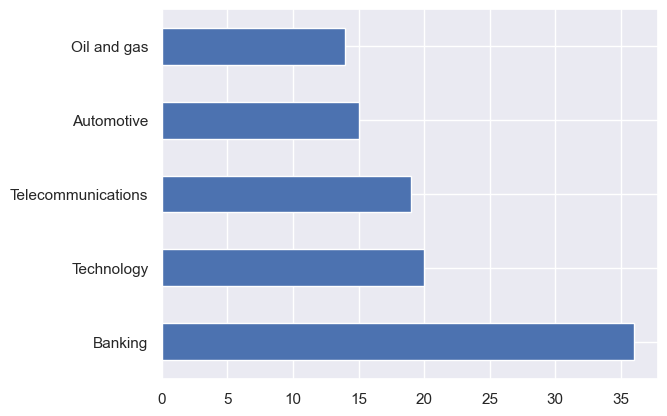

In [18]:
# Top 5 industries
# Divided by 3 since every record will appear 3 times
industry_count = df_final['Industry'].sort_values().value_counts().head()/3
industry_count.plot(kind='barh')

In [19]:
industry_count

Banking               36.0
Technology            20.0
Telecommunications    19.0
Automotive            15.0
Oil and gas           14.0
Name: Industry, dtype: float64

<Axes: >

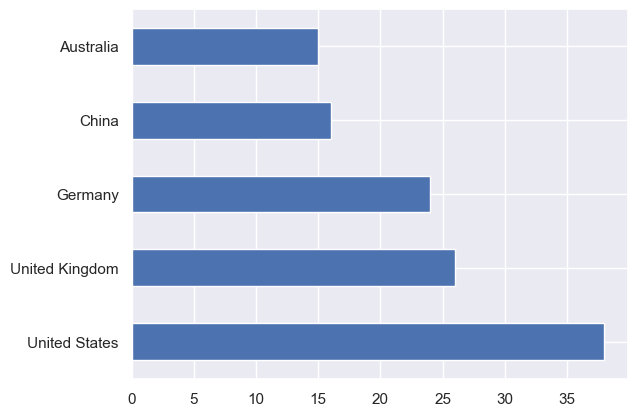

In [20]:
# Top 5 Countries which Companies were founded
countries_count = df_final['Country Founded'].sort_values().value_counts().head()/3
countries_count.plot(kind='barh')

In [21]:
df_final['Country Founded'].sort_values().value_counts().head()/3

United States     38.0
United Kingdom    26.0
Germany           24.0
China             16.0
Australia         15.0
Name: Country Founded, dtype: float64

<Axes: xlabel='Year Founded', ylabel='Count'>

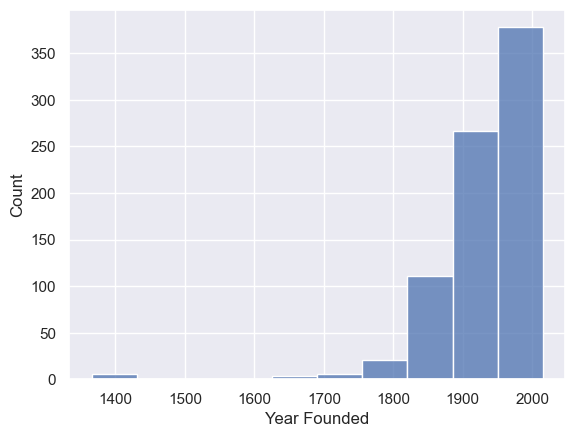

In [22]:
# Scanning distribution of Data based on year founded
sns.histplot(df_final, x= 'Year Founded', bins = 10)

<Axes: ylabel='Company Name'>

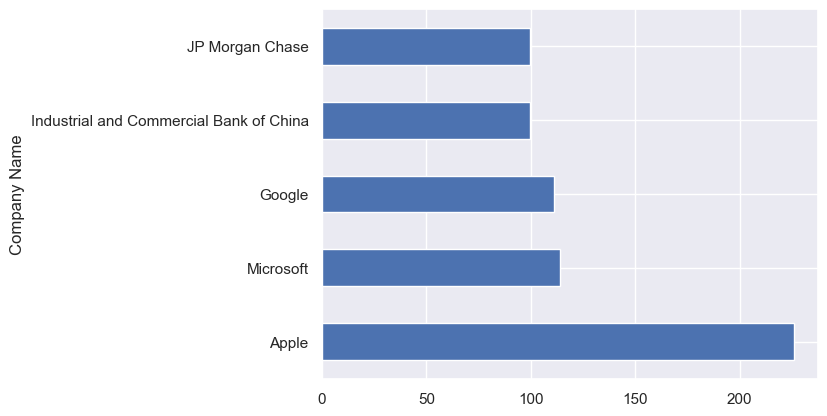

In [23]:
# Top 5 most profitable companies between 2018 - 2020
net_income = df_final.groupby('Company Name')['Net Income'].sum().sort_values(ascending=False).head()
net_income.plot(kind='barh')

In [24]:
net_income.head(3)

Company Name
Apple        226.1
Microsoft    113.9
Google       111.2
Name: Net Income, dtype: float64

<Axes: ylabel='Company Name'>

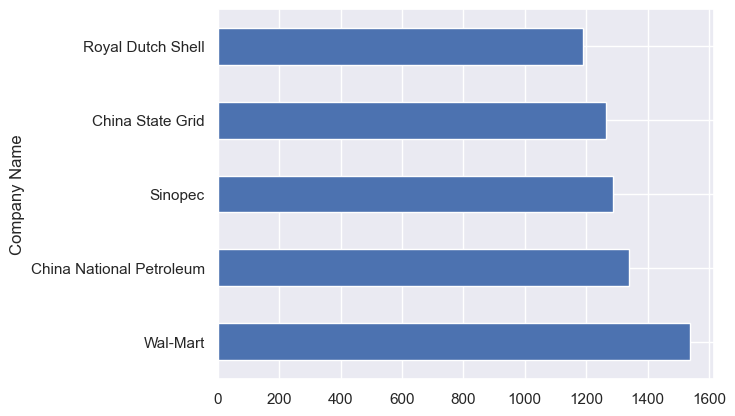

In [25]:
# Top 5 companies that Generates the most Revenue between 2018 - 2020
net_revenue = df_final.groupby('Company Name')['Revenue'].sum().sort_values(ascending=False).head()
net_revenue.plot(kind='barh')

In [26]:
net_revenue

Company Name
Wal-Mart                    1539.1
China National Petroleum    1339.8
Sinopec                     1287.3
China State Grid            1265.0
Royal Dutch Shell           1189.8
Name: Revenue, dtype: float64

<Axes: ylabel='Industry'>

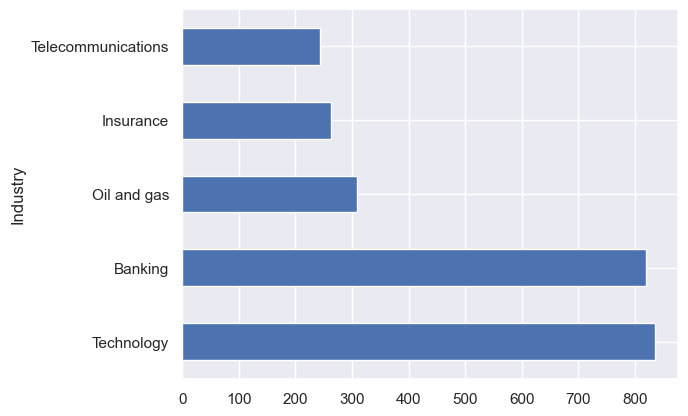

In [27]:
# Top 5 most profitable industry between 2018 - 2020
net_income_industry = df_final.groupby('Industry')['Net Income'].sum().sort_values(ascending=False).head()
net_income_industry.plot(kind='barh')

In [28]:
net_income_industry.head(3)

Industry
Technology     835.083
Banking        820.416
Oil and gas    308.300
Name: Net Income, dtype: float64

<Axes: ylabel='Industry'>

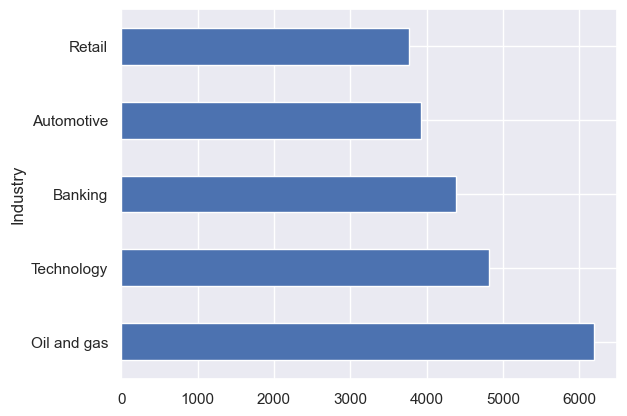

In [29]:
# Top 5 industries that Generates the most Revenue between 2018 - 2020
net_revenue_industry = df_final.groupby('Industry')['Revenue'].sum().sort_values(ascending=False).head()
net_revenue_industry.plot(kind='barh')

In [30]:
net_revenue_industry

Industry
Oil and gas    6186.800
Technology     4811.800
Banking        4386.377
Automotive     3926.900
Retail         3767.750
Name: Revenue, dtype: float64

<Axes: ylabel='Country Founded'>

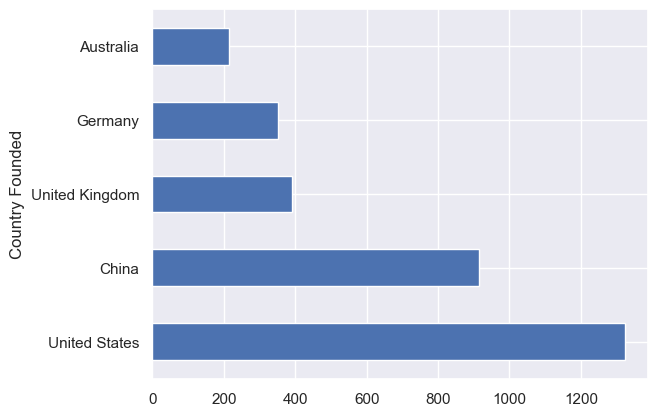

In [31]:
# Top 5 most profitable countries between 2018 - 2020
net_income_country = df_final.groupby('Country Founded')['Net Income'].sum().sort_values(ascending=False).head()
net_income_country.plot(kind='barh')

In [32]:
net_income_country.head(3)

Country Founded
United States     1323.088
China              913.600
United Kingdom     390.988
Name: Net Income, dtype: float64

<Axes: ylabel='Country Founded'>

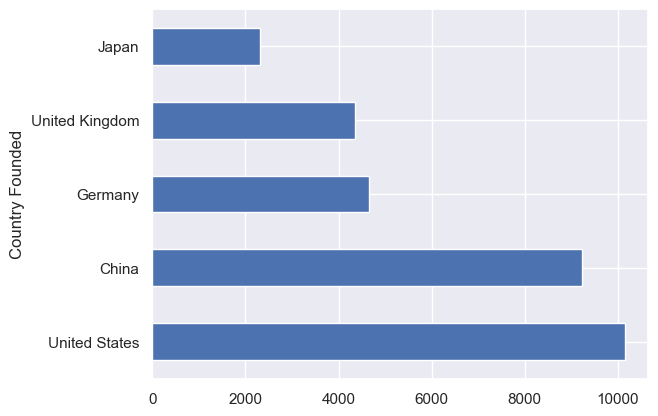

In [33]:
# Top 5 countries that Generates the most Revenue between 2018 - 2020
net_revenue_country = df_final.groupby('Country Founded')['Revenue'].sum().sort_values(ascending=False).head()
net_revenue_country.plot(kind='barh')

In [34]:
net_revenue_country.head(3)

Country Founded
United States    10153.991
China             9229.900
Germany           4659.200
Name: Revenue, dtype: float64

In [35]:
# Checking correlations in data set with a focus on net income
corr_matrix = df_final.corr()
corr_matrix['Net Income'].sort_values(ascending=False)

C:\Users\Dolf\AppData\Local\Temp\ipykernel_19268\3539485801.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_final.corr()


Net Income      1.000000
Revenue         0.599037
Year            0.045322
Year Founded    0.043310
Name: Net Income, dtype: float64

<Axes: xlabel='Revenue', ylabel='Net Income'>

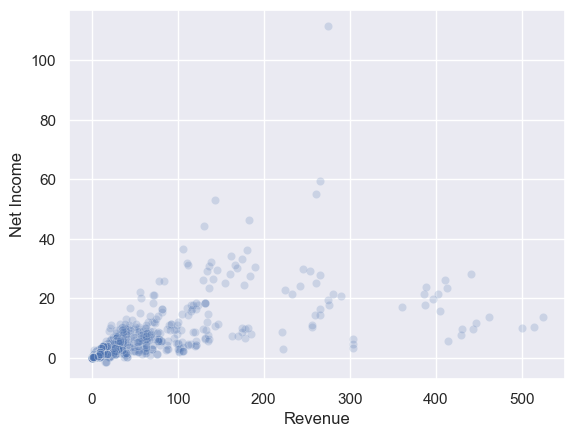

In [36]:
sns.scatterplot(df_final, x='Revenue', y='Net Income', alpha = 0.2)

### 5. Insights

#### Insights
* The data consists of 264 of some of the biggest companies globally
* A majority of these companies form part of the banking sector, nearly double of those in Technology and Telecommunication respectively
* Most companies are founded in the USA, followed by the United Kingdom and Germany
* There has been a drastic rise of new companies between 1900 and 2015
* Companies and industries that generate the most Revenue are not the most profitable
* Despite the UK and Germany having more companies listed than China, China generated more profit and revenue between 2018 and 2020 with USA topping the charts.
* The Technology and Banking sectors were the most profitable industries between 2018 and 2020, evenly matched followed by the Oil and Gas industry which is over half lesser than the 2 top sectors
* Technology has fewer companies than banking but higher profit
* Apple was by far the most profitable company in the given period, with double the profit of Microsoft and Google respectively
* The top 3 most profitable companies are in the Technology sector and were founded in USA
* The data does not contain any relevant correlations